# Creating Customer Segments



The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). 

In [119]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration


In [120]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,1020,8816,12121,134,4508,1080
2,21632,1318,2886,266,918,405


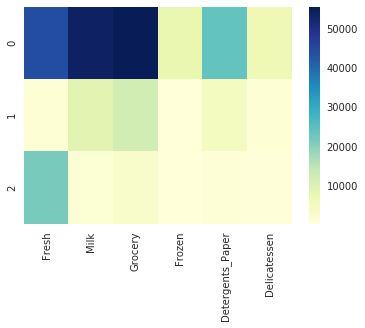

In [121]:
#  Select three indices of your choice you wish to sample from the dataset
indices = [47,16,32]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


import seaborn as sns; sns.set()

ax = sns.heatmap(samples, cmap="YlGnBu")



Index(0) 47th: This customer could be a SuperMarket or retailer Grocery Store based on their purchases, all the purchases are higher than the average.


Index(1) 16th: This customer could be a small market/small grocery store based on their higher purchase of milk, grocery and detergent_paper spendings. In this case, other category purchase is below average so it is small store compared to above supermarket.


Index(2) 32nd: This customer could be a fresh food supplier it is mainly purchased fresh food, with a large value compared to other categories.

In [124]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


#  Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25, random_state = 4)

#  Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

#  Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print 'score is' ,score

score is 0.7138231763036409




I attempted to predict the 'Detergents_Paper' feature.

The reported prediction score (R^2) was 71.38%.

I tested other features as well and i got milk( 0.24), fresh (-1.34) fail to fit, Frozen(0.024).

As per my feature test milk, frozen and fresh are very important but based on this it seems that Detergents_paper(0.7) is the least necesary for identifying spending pattern, becasue it is easiest to predict from other data.

### Visualize Feature Distributions


/home/kcsh_ptl/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


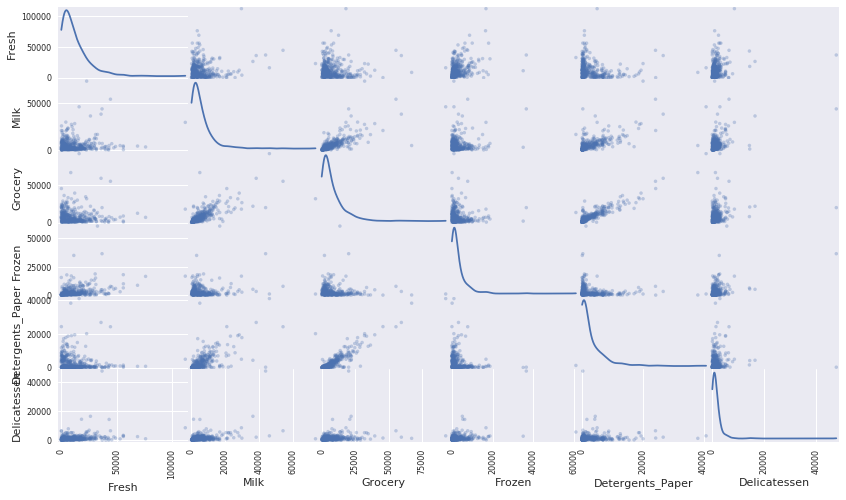

In [125]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');



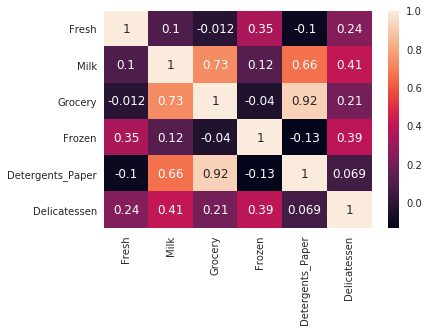

In [126]:
sns.heatmap(data.corr(), annot=True)




I can see 3 pairs of features seem to indicate some good correlation:

Detergents_Paper and Grocery: As per heatmap and matrix graph those two are strongly correlated with 0.92 value.

Detergents_Paper and Milk: Another linear correlation, is between Detergents_paper and Milk with 0.66 value. 

Grocery and Milk: Those two are also correlated with good score of 0.73.

So, I can confirm that Detergents_Paper has a weak relevance to the data, from the heatmap and the previous score. This is because it correlates well with Grocery and Milk, so we could't get much information by adding the Detergents_paper. for those fetures data distributions in linear fromat.

Generally, the distribution for the points seem highly skewed towards the origin, and not normally distributed. I think it because of outliers. 



## Data Preprocessing


/home/kcsh_ptl/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


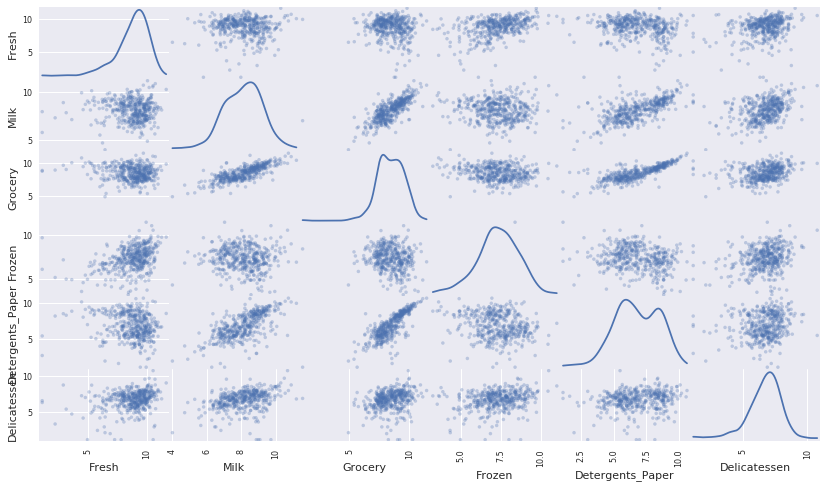

In [127]:
#  Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [128]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,6.927558,9.084324,9.402695,4.897840,8.413609,6.984716
2,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points.

In [135]:
all_outliers = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    #  Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    #  Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    
    points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, points.index.values.astype('int64'))
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(points)
    

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]
print outliers
outliers  = [65,66,75,128,154]

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]




There are few data points considered outliers, some outliers are in multiple features [ 65  66  75 128 154]. 

So instead of removing all of the outliers, i decided to remove mentioned 5 outliers. 

Removing all outliers cause data and information loss to us and some of these outliers are describing customer patterns.

Removing those will reduce the potential of skewing our results.

## Feature Transformation


###  PCA



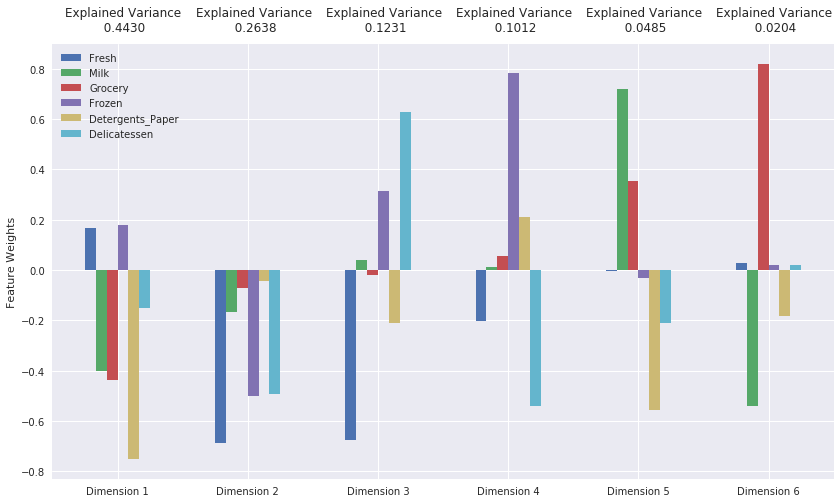

In [136]:
from sklearn.decomposition import PCA 
#Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)



First 2 principal components:

1st PC: 44.3%

2nd PC: 26.3%

Total: 70.6%


First 4 principal components:

1st + 2nd = 70.6%

3rd PC: 12.3%

4th PC: 10.1%

Total: 93%

Every Principal components represent pattern of customer spendings.

1st PC represents little information gain from Fresh and Frozen . However, it very badly predicts Detergent_paper, Milk and Grocery.This will be a small store with fresh and frozen iteams

2nd PC represents negetivity in information gain. Fresh , frozen and delecatessen category have very hugh information loss compared to Detergent_paper.it is hard to tell about this pattern.

3rd PC represents Frozen and Delicatessen features recovery and loss in fresh feature information. This could be a resturant.

4th PC represents very huge positivity in frozen feature but another side loss in deli feature so it could be a frozen (meat)food supplier.


### Observation


In [137]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3646,-3.9519,-0.1229,0.6240,0.5379,0.0551
1,-2.7939,2.0377,0.3420,-1.2847,0.1457,-0.1353
2,0.5743,0.5709,-1.8390,-1.2760,-0.6685,0.0878


### Dimensionality Reduction


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941


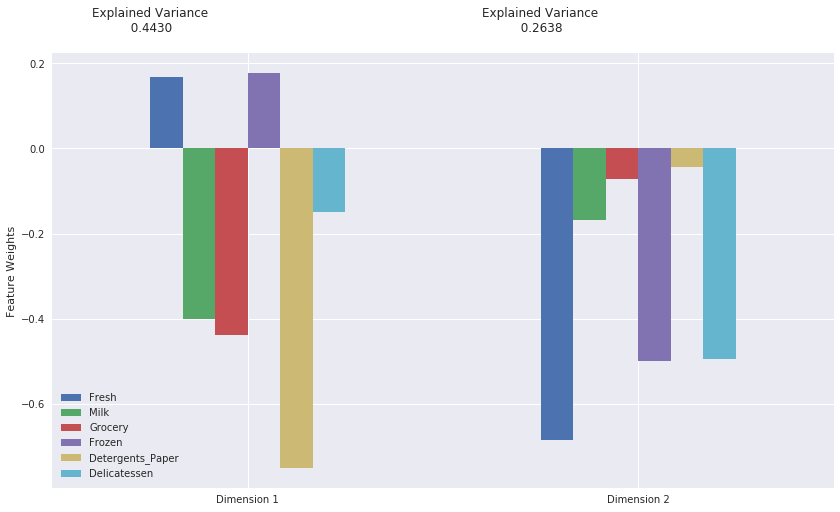

In [140]:
#  Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation


In [139]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.3646,-3.9519
1,-2.7939,2.0377
2,0.5743,0.5709


## Visualizing a Biplot


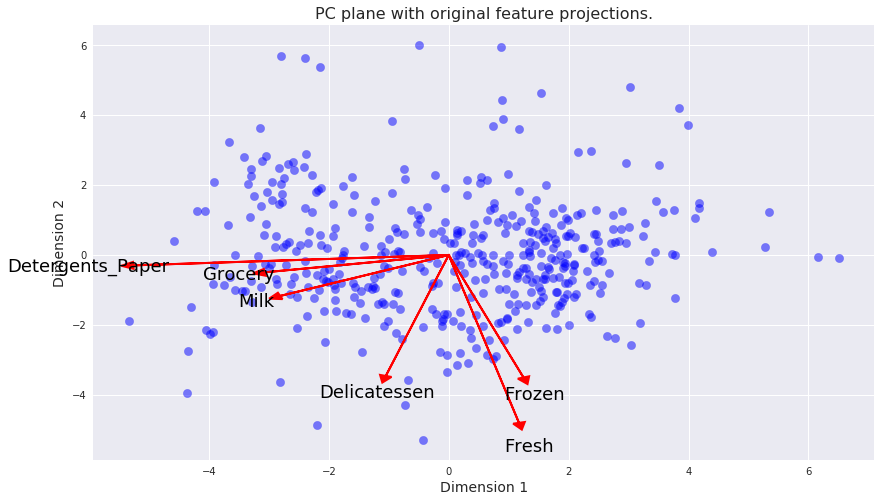

In [141]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)



K-means : 
The advantages of K-means clustering is it Converge fast on k-clusters after certian iterations.
K-means is computationally faster and robust than other clustering methods.

Gaussian Mixture Model:
In other hands, GMM delivers soft-assignment clusters. each data point is assigned a probability for each cluster to how likely they belongs to that cluster.lower probability could be assigned to multiple clusters at once. Gmm is the fastest for applying mixture models.

As per my understanding till now data points not belong to particular clusters, but i m little confused beacuse we can use k-means for general purpose and other Gaussian mixturemodel for mixed corelations.still its unclear the structure for me So intuitively i would go with Gausssian Mixture model.



In [175]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def Gauss_clust(k):
     
    global clusterer, preds, centers, sample_preds
    

    clusterer = GaussianMixture(n_components=k).fit(reduced_data)

#  Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

#  Find the cluster centers
    centers = clusterer.means_


#  Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

#  Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score
    
   
results = pd.DataFrame(columns=['Silhouette Score'])

for k in range(2,10):
    score = Gauss_clust(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)



,Silhouette Score
2,0.421917
3,0.366083
4,0.327315
5,0.234425
6,0.334943
7,0.323736
8,0.323118
9,0.244564



From above score for clusters


Gaussian Mixture Model with 2 clusters have the best silhouette score.

## Visualization


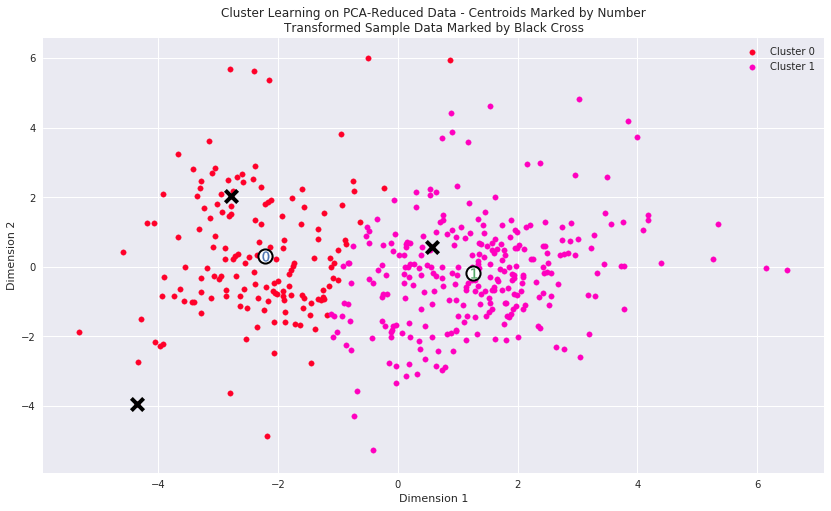

In [179]:

# higest score with 2 clusters
Gauss_clust(2)

vs.cluster_results(reduced_data, preds, centers, pca_samples)

###  Data Recovery


In [180]:
#  Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#  Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


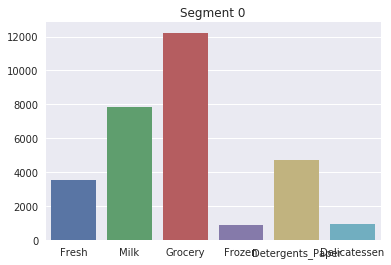

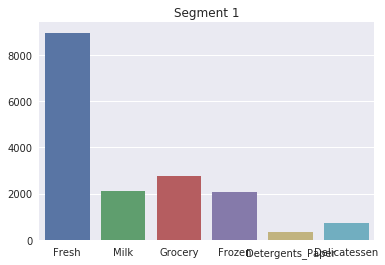

In [182]:
import matplotlib.pyplot as plt
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)



Segment 0:
The Grocery and Milk values are higher than the overall mean value we saw in data Exploration section, I can say that it could be a Supermarket or grocery market.

Segment 1:
This in all probability about to restaurant/supplier serving fresh food because of the high value of Fresh category compared to other. But looking at Data Exploration section it's showing that value is below mean value for fresh feature value.

In [183]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 0)
('Sample point', 1, 'predicted to be in Cluster', 0)
('Sample point', 2, 'predicted to be in Cluster', 1)




Index(0) 47th

old prediction: SuperMarket or retailer Grocery Store

model prediction: Super Market or grocery market

Model suggested same prediction which was i predicted previousy.

Index(1) 16th

old prediction: small market/small grocery store

model prediction: Super Market or grocery market

Model predicted super market or grocery market which is very close to my previous prediction. Previous prediction was small market or small grocery store.

Index(2) 32nd

old prediction: fresh food supplier.

Model prediction: Restaurant/supplier of fresh food

This prediction some how agree with my old predictions.due to large amount of fresh compared to other categories it is fresh food supplier.

Overall my all previously guessed prediction was mostly consistant with model predictions.

## Conclusion



Our model distributed customers in two main type

Segment 0: Supermarket/ grocery market

Segment 1: Fresh food supplier

The wholesale company selects the particular subset of customers from both the Segments for A/B testing. and start making particular changes in this case 5 days a week delivery to 3 days a week delivery.

Another thing Segment 0 serves a variety of items so people can store and stock up their needs but in Segment 1 they serve fresh food so people need fresh food on daily basis so might be cut off the days would be the negative impact on them. 

If positive result found in any of the clusters they could implement and make a good decision about their next step.

Negative impact would have low satisfaction level and low sales which would be one of the cases.



We already have predicted labels for our old customers, so now we can use support vector machine or logistic regression

like supervised learning to train the model on customers spendings on different categories. Then we can use this model to 

classify our new customers and thier spending. The target variable will be cluster group (0 or 1).

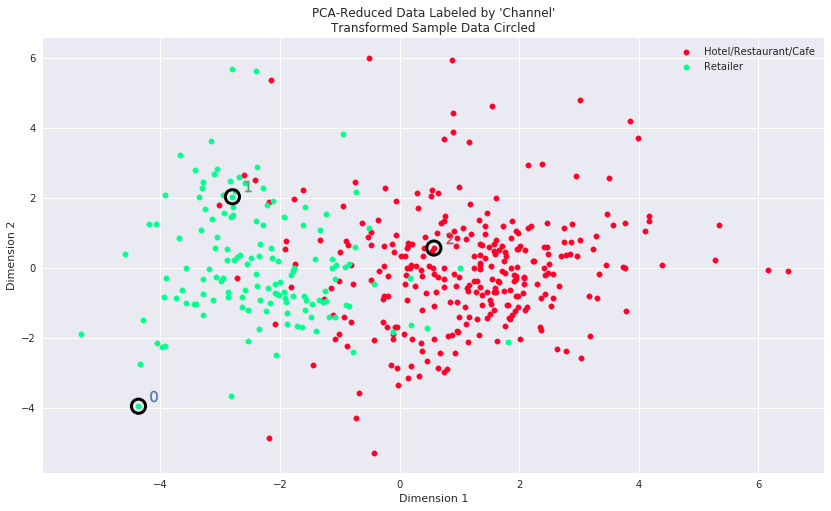

In [184]:
#clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)



It seems both Gaussian model and the number of clusters i have chosen are highly comparble to underlying distribution shown in the plotting.

The customer segments is somehow classified as Resturant and Retailers. 

However some points are ambiguous and dose not clearly belong to cluster. Some points are overlapping too.
